# geopandas кітапханасын импорттау

In [1]:
import geopandas as gpd

# geopandas арқылы shapefile форматын оқу және matplotlib арқылы бейнелеу

      OBJECTID                irr_massiv hdm_dist  ground_w  soil_mekh  \
0            1             Ақдала алқабы        V         2          3   
1            2            Бестөбе алқабы        I         1          0   
2            3  Күшік-Қалпы суару алқабы      VII         3          4   
3            4      Қаратал күріш жүйесі       II         1          1   
4            5      Қаратал күріш жүйесі       IX         3          6   
...        ...                       ...      ...       ...        ...   
2712      2713           Шеңгелді алқабы        V         2          3   
2713      2714           Шеңгелді алқабы        V         2          3   
2714      2715           Шеңгелді алқабы        V         2          3   
2715      2716           Шеңгелді алқабы        V         2          3   
2716      2717           Шеңгелді алқабы        V         2          3   

                                               geometry  
0     POLYGON Z ((76.73069 44.50647 0.00000, 76.7287.

<Axes: >

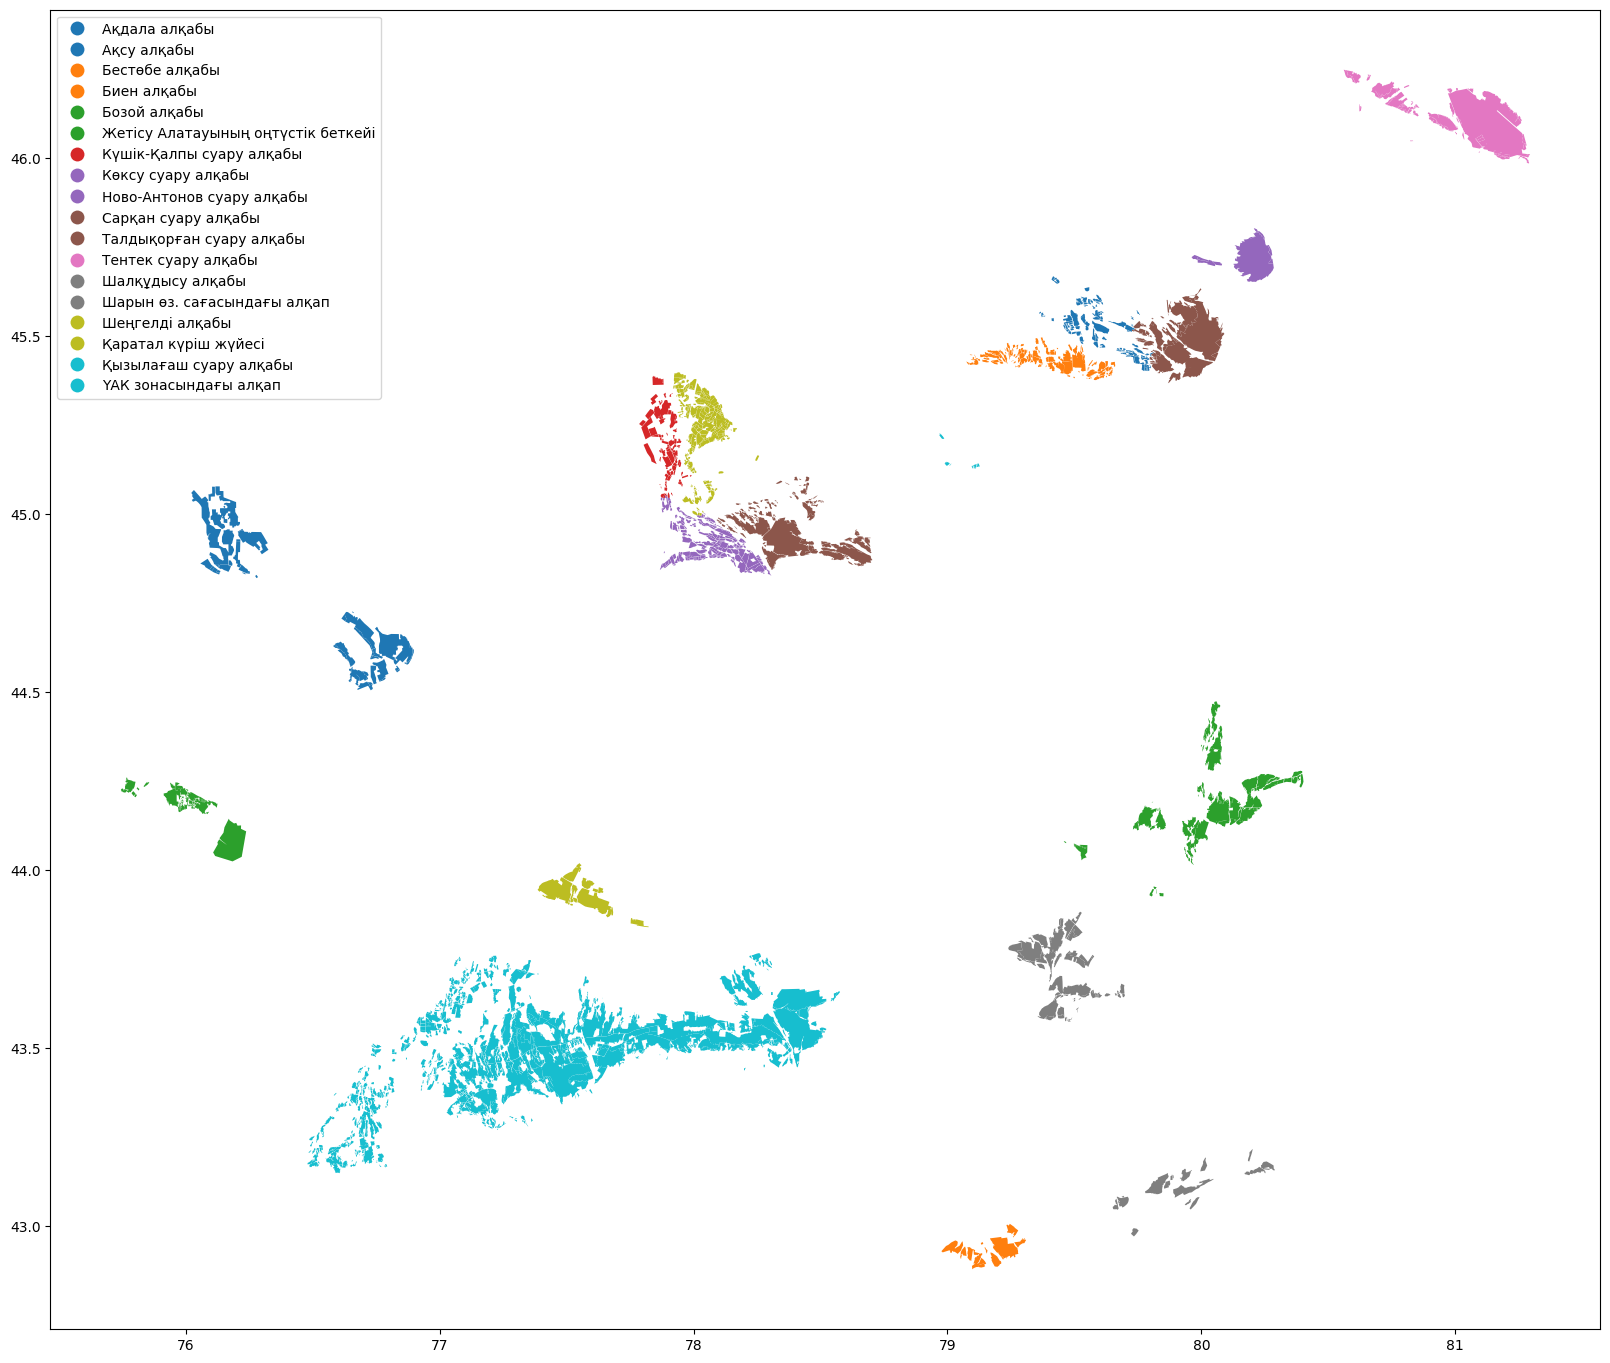

In [2]:
irrland_massif_shp = gpd.read_file('data/shape_files/irrigated_massif2.shp') 
print(irrland_massif_shp)
%matplotlib inline
irrland_massif_shp.plot(column='irr_massiv', cmap=None, legend=True, figsize=(20, 20), legend_kwds={'loc': 'upper left'})

# Суармалы егіншілік алқаптарын 9 гидромодульді ауданға жіктеу

In [3]:
if 'hyd_m' not in irrland_massif_shp.columns:  # check if field exists
    irrland_massif_shp['hyd_m'] = 0  # initialize field, float, two decimals
    
irrland_massif_shp['hyd_m'] = irrland_massif_shp['ground_w'] + irrland_massif_shp['soil_mekh']
    
print(irrland_massif_shp)

      OBJECTID                irr_massiv hdm_dist  ground_w  soil_mekh  \
0            1             Ақдала алқабы        V         2          3   
1            2            Бестөбе алқабы        I         1          0   
2            3  Күшік-Қалпы суару алқабы      VII         3          4   
3            4      Қаратал күріш жүйесі       II         1          1   
4            5      Қаратал күріш жүйесі       IX         3          6   
...        ...                       ...      ...       ...        ...   
2712      2713           Шеңгелді алқабы        V         2          3   
2713      2714           Шеңгелді алқабы        V         2          3   
2714      2715           Шеңгелді алқабы        V         2          3   
2715      2716           Шеңгелді алқабы        V         2          3   
2716      2717           Шеңгелді алқабы        V         2          3   

                                               geometry  hyd_m  
0     POLYGON Z ((76.73069 44.50647 0.00000, 7

# Нәтижені бейнелеу

<Axes: >

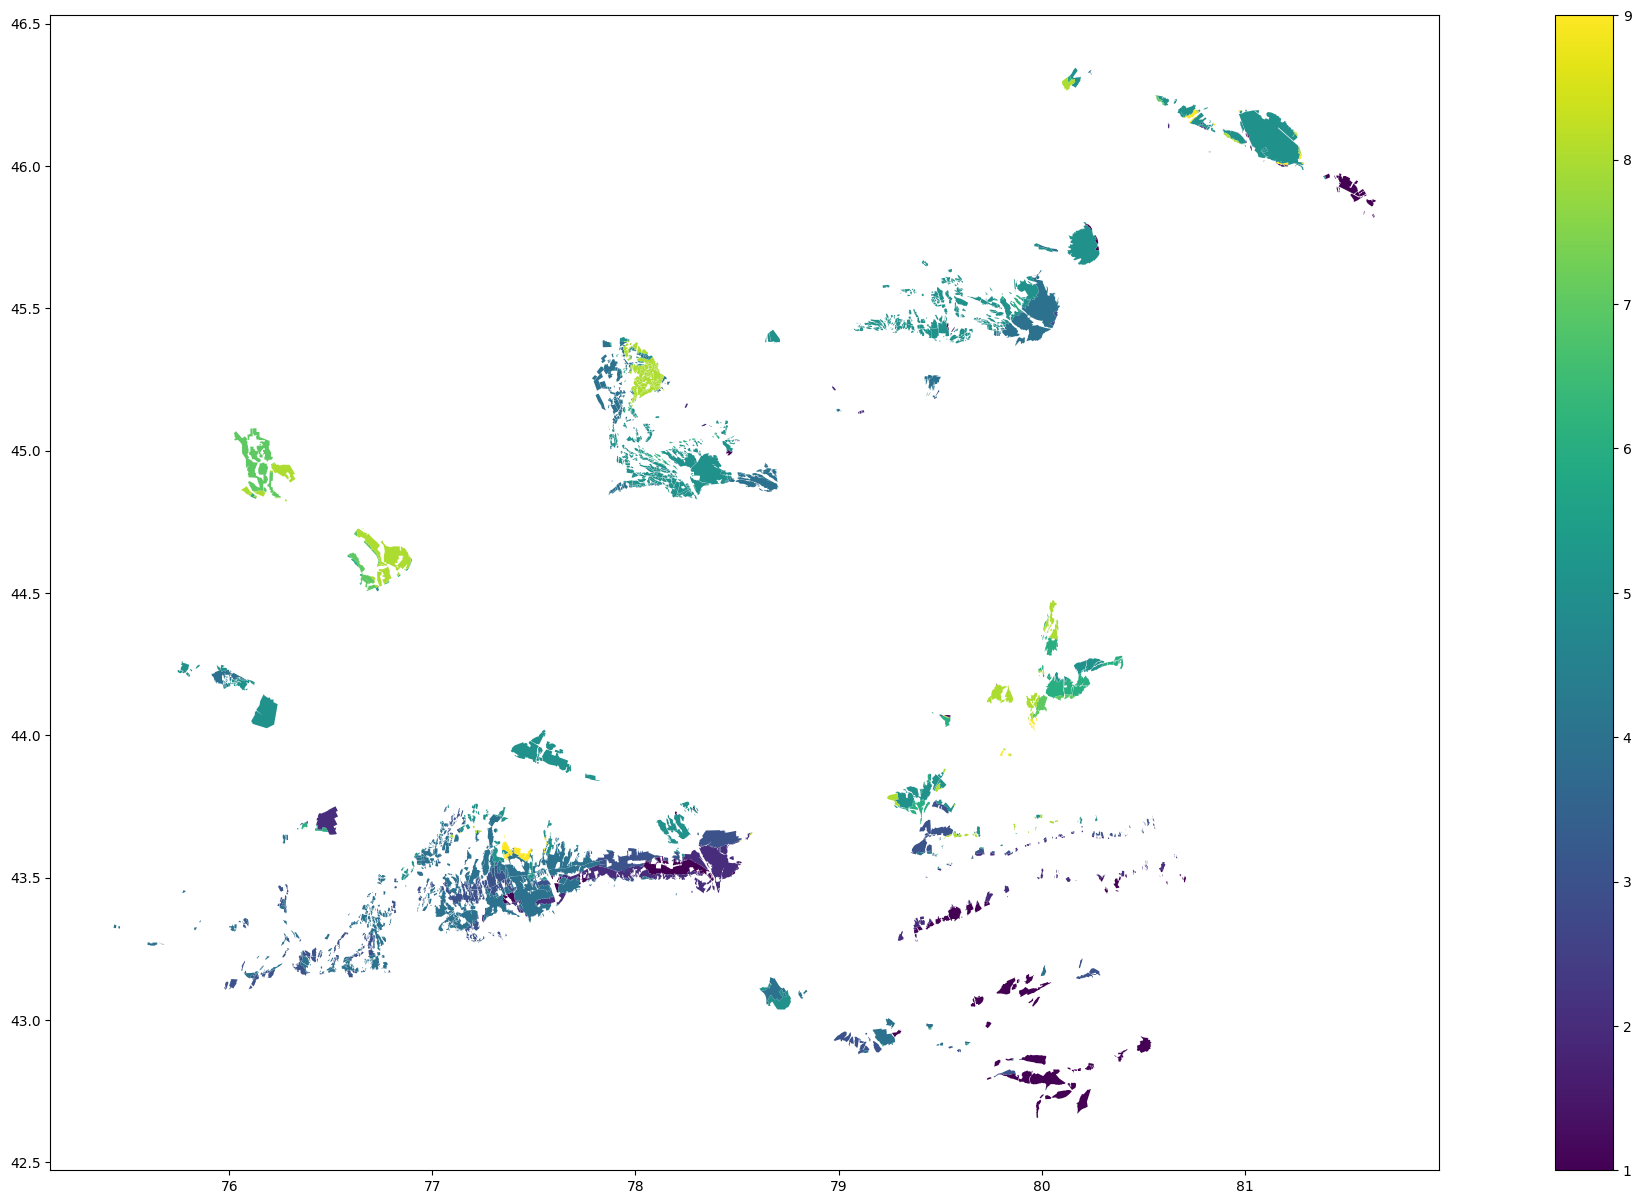

In [4]:
%matplotlib inline
irrland_massif_shp.plot(column='hyd_m', legend=True, figsize=(30, 15))

In [5]:
# Нәтижені сақтау
irrland_massif_shp.to_file('data/hydromodule_zoning.shp', driver='ESRI Shapefile', encoding='UTF-8')